# Analysing and predicting the income of America 
### The dataset acs2015 census tract data is based on 5-year estimates from the 2015 American Community Survey and depicts a survey of the people counted in the United States. The census data can be combined with other data analysis techniques to forecast things like state or income, poverty, unemployment, employment, total population in US states. 

## Objective
### The main aim of this dataset to estimates the income of men and women , total population of men and women , analyse the income growth by State , poverty level of race , estimate the employment and unemployment growth in every states.  

## PART 1: Data Preprocessing 

In [2]:
! pip install missingno

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
! pip install plotly


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
# Data wrangling
import pandas as pd 
import csv

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# Date wrangling
import datetime

# Math operations
import numpy as np

# Random sampling
import random
import missingno as msno

from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format', lambda x: f'%.{2}f' % x)
import math
from sklearn.ensemble import RandomForestRegressor

In [5]:
from scipy import stats
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split # split the data into train and test set 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,explained_variance_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from numpy import arange

from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [6]:
#Loading the dataset
df = pd.read_csv('E:/st.clair college canada/semester 4th/DAB402_Capstone project/US_CENSUS_DATA_2015.csv')
df.head(5)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.90,87.40,7.70,0.30,0.60,0.00,1503,61838.00,11900.00,25713.00,4548.00,8.10,8.40,34.70,17.00,21.30,11.90,15.20,90.20,4.80,0.00,0.50,2.30,2.10,25.00,943,77.10,18.30,4.60,0.00,5.40
1,1001020200,Alabama,Autauga,2156,1059,1097,0.80,40.40,53.30,0.00,2.30,0.00,1662,32303.00,13538.00,18021.00,2474.00,25.50,40.30,22.30,24.70,21.50,9.40,22.00,86.30,13.10,0.00,0.00,0.70,0.00,23.40,753,77.00,16.90,6.10,0.00,13.30
2,1001020300,Alabama,Autauga,2968,1364,1604,0.00,74.50,18.60,0.50,1.40,0.30,2335,44922.00,5629.00,20689.00,2817.00,12.70,19.70,31.40,24.90,22.10,9.20,12.40,94.80,2.80,0.00,0.00,0.00,2.50,19.60,1373,64.10,23.60,12.30,0.00,6.20
3,1001020400,Alabama,Autauga,4423,2172,2251,10.50,82.80,3.70,1.60,0.00,0.00,3306,54329.00,7003.00,24125.00,2870.00,2.10,1.60,27.00,20.80,27.00,8.70,16.40,86.60,9.10,0.00,0.00,2.60,1.60,25.30,1782,75.70,21.20,3.10,0.00,10.80
4,1001020500,Alabama,Autauga,10763,4922,5841,0.70,68.50,24.80,0.00,3.80,0.00,7666,51965.00,6935.00,27526.00,2813.00,11.40,17.50,49.60,14.20,18.20,2.10,15.80,88.00,10.50,0.00,0.00,0.60,0.90,24.80,5037,67.10,27.60,5.30,0.00,4.20


In [7]:
# Finding the input dataset size and shape
df.shape

(74001, 37)

#### There are 74001 observations and 37 attributes.

In [8]:
# display the all columns  
df.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

#### There are list of 37 attributes of  my datset.

In [9]:
# Printing the infomation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusTract      74001 non-null  int64  
 1   State            74001 non-null  object 
 2   County           74001 non-null  object 
 3   TotalPop         74001 non-null  int64  
 4   Men              74001 non-null  int64  
 5   Women            74001 non-null  int64  
 6   Hispanic         73311 non-null  float64
 7   White            73311 non-null  float64
 8   Black            73311 non-null  float64
 9   Native           73311 non-null  float64
 10  Asian            73311 non-null  float64
 11  Pacific          73311 non-null  float64
 12  Citizen          74001 non-null  int64  
 13  Income           72901 non-null  float64
 14  IncomeErr        72901 non-null  float64
 15  IncomePerCap     73261 non-null  float64
 16  IncomePerCapErr  73261 non-null  float64
 17  Poverty     

In [10]:
# Printing the descriptive Statistics for the Numerical fields in dataframe
df.describe()

,CensusTract,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.00,74001.00,74001.00,74001.00,73311.00,73311.00,73311.00,73311.00,73311.00,73311.00,74001.00,72901.00,72901.00,73261.00,73261.00,73166.00,72883.00,73194.00,73194.00,73194.00,73194.00,73194.00,73204.00,73204.00,73204.00,73204.00,73204.00,73204.00,73052.00,74001.00,73194.00,73194.00,73194.00,73194.00,73199.00
mean,28391128262.00,4325.59,2127.65,2197.94,16.86,62.03,13.27,0.73,4.59,0.15,3043.08,57225.56,9134.49,28491.23,3942.91,16.96,22.49,34.80,19.10,23.95,9.29,12.86,75.53,9.63,5.46,3.12,1.89,4.37,25.67,1983.91,78.98,14.62,6.23,0.17,9.03
std,16475927905.34,2129.31,1072.33,1095.73,22.94,30.68,21.76,4.49,8.79,1.04,1475.49,28663.33,5920.34,15047.07,3023.03,13.20,19.19,15.01,8.28,5.96,6.02,7.67,15.37,5.37,11.72,5.88,2.60,3.90,6.96,1073.43,8.35,7.54,4.04,0.46,5.96
min,1001020100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2611.00,390.00,128.00,85.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.20,0.00,0.00,0.00,0.00,0.00,0.00
25%,13039010401.00,2891.00,1409.00,1461.00,2.40,39.40,0.70,0.00,0.20,0.00,2037.00,37683.00,5317.00,19123.00,2312.00,7.20,7.00,24.10,13.40,20.10,5.00,7.10,72.00,6.00,0.00,0.40,0.40,1.80,20.80,1249.00,74.60,9.60,3.50,0.00,5.10
50%,28047001300.00,4063.00,1986.00,2066.00,7.00,71.40,3.70,0.00,1.40,0.00,2863.00,51094.00,7732.00,25344.00,3127.00,13.40,17.80,32.60,17.90,23.80,8.40,11.80,79.70,8.80,1.10,1.40,1.10,3.50,25.00,1846.00,80.10,13.40,5.50,0.00,7.70
75%,42003414101.00,5442.00,2674.00,2774.00,20.40,88.30,14.40,0.40,4.80,0.00,3838.00,70117.00,11258.00,33894.00,4537.00,23.10,33.80,43.88,23.60,27.50,12.50,17.40,84.90,12.30,4.70,3.50,2.50,5.90,29.80,2553.00,84.60,18.20,8.10,0.00,11.40
max,72153750602.00,53812.00,27962.00,27250.00,100.00,100.00,100.00,100.00,91.30,84.70,37416.00,248750.00,123116.00,254204.00,134380.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,80.00,24075.00,100.00,100.00,100.00,26.50,100.00


*>Observations: *>So the Census tract dataset contains 74001 rows and 37 columns.

**>Apart from State and County the rest of the 35 fields are numeric.

**>The count for all the fields dont match so some of the fields have missing values.

**>Lets quickly visualize the missing values.

In [11]:
#checking the missing values in each attributes
df.isnull().sum()

CensusTract           0
State                 0
County                0
TotalPop              0
Men                   0
Women                 0
Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Citizen               0
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
Employed              0
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

In [12]:
#sum of total missing values 
df.isnull().sum().sum()

23569

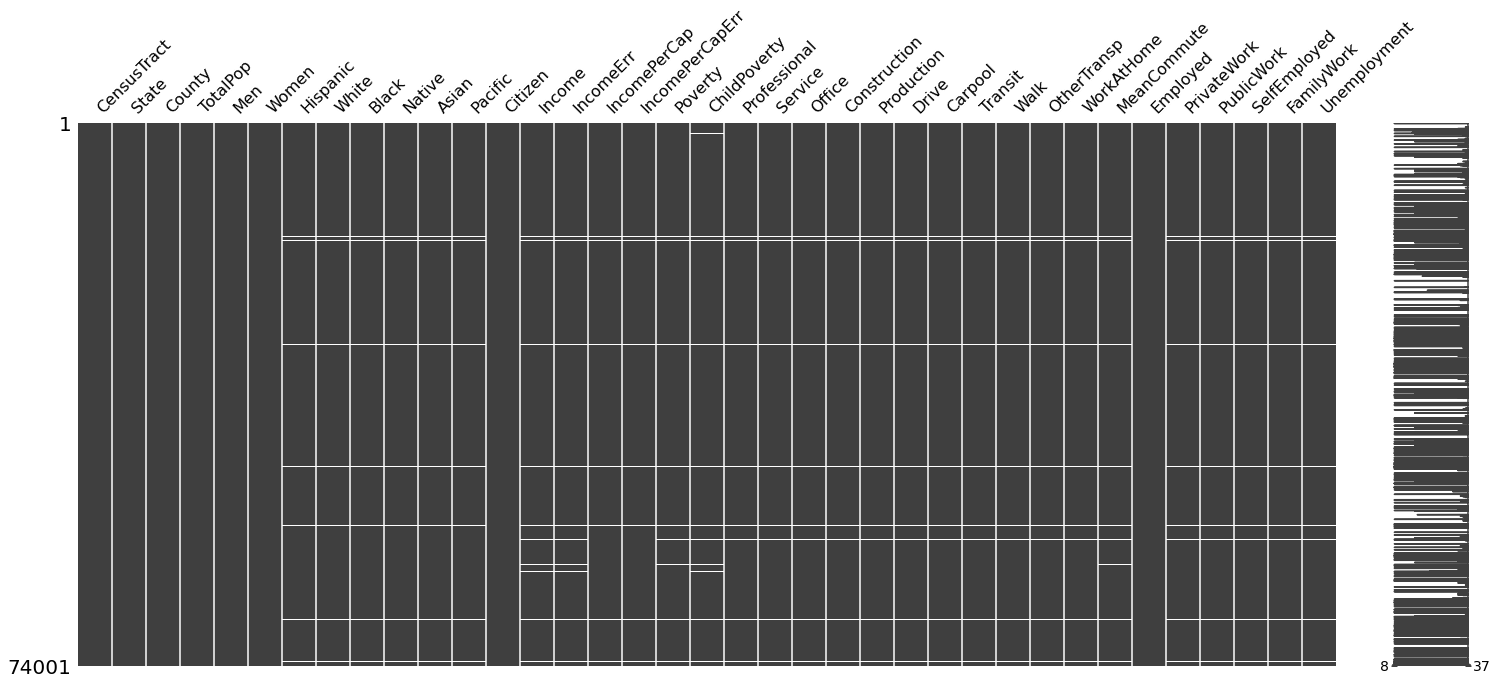

In [13]:
# Visualizing the  missing values as a matrix using missingno library
msno.matrix(df)
plt.show()

#### Interesting, We have missing values in the Entire rows.For examaple, "'CensusTract', 'State', 'County', 'TotalPop',
#### 'Men', 'Women','Citizen' and Employed have NON-Null values but these attributes contains the 0 values and other attributes have
#### missing values, but we cannot fill the missing values beacuse if there is no population or Men and women data is not  exist then 
#### there is no meaning to fill  missing values. 

<AxesSubplot:>

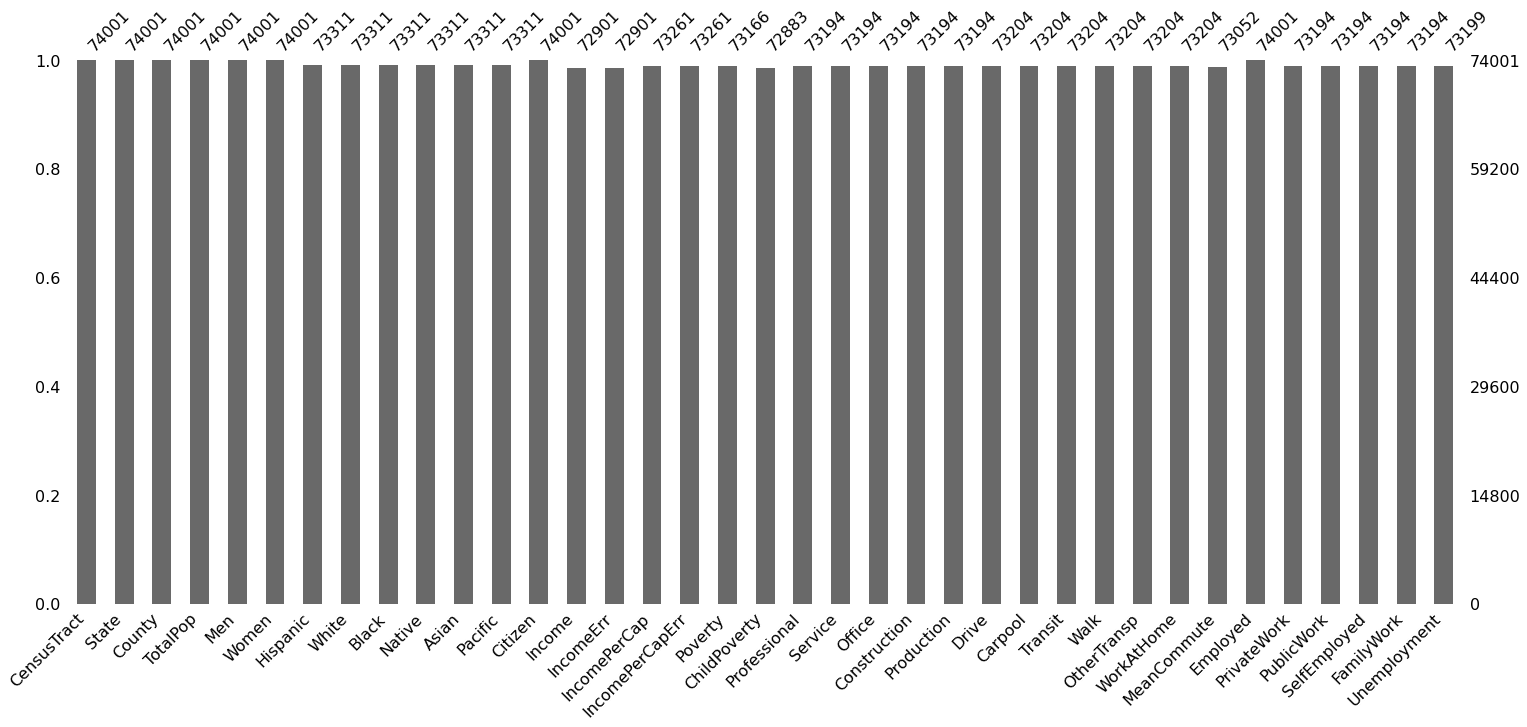

In [14]:
#visualize the missing values with bar graph 
msno.bar(df)

### Explanation:
#### Now analyzing population features - TotalPop, Men, Women, Citizen and Employed.



In [15]:
#Check the rows where the Total Pop =0
df_pop=df.loc[df['TotalPop'] == 0]
df_pop.head()
#df_totpop.T # transposing the data
#df_totpop.to_csv("df_totpop.csv")

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
43,1003990000,Alabama,Baldwin,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
107,1015981902,Alabama,Calhoun,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
108,1015981903,Alabama,Calhoun,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
868,1097990000,Alabama,Mobile,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1063,1117980000,Alabama,Shelby,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


#### So Now we can clearly seen that which attributes have Non-null values beside the  missing values. In Actual, they contained 0 values overall, condition is satisfied , we cannot fill the missing values with help any method. so we decided to drop the entire rows. 

In [16]:
print("Number of Census Tracts where the 'Total Population' is not same as the total of Men and Women Population = ",
      (df['TotalPop'] - (df['Men'] + df['Women'])).sum())

Number of Census Tracts where the 'Total Population' is not same as the total of Men and Women Population =  0


In [17]:
#Finding the Duplicates rows in dataframe
df.duplicated().sum()

0

In [18]:
# Drop the unncessary columns
df.drop(['IncomeErr','IncomePerCap','IncomePerCapErr'], axis=1, inplace=True) # we aleady have "Income" target variable.
df.head(5)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.90,87.40,7.70,0.30,0.60,0.00,1503,61838.00,8.10,8.40,34.70,17.00,21.30,11.90,15.20,90.20,4.80,0.00,0.50,2.30,2.10,25.00,943,77.10,18.30,4.60,0.00,5.40
1,1001020200,Alabama,Autauga,2156,1059,1097,0.80,40.40,53.30,0.00,2.30,0.00,1662,32303.00,25.50,40.30,22.30,24.70,21.50,9.40,22.00,86.30,13.10,0.00,0.00,0.70,0.00,23.40,753,77.00,16.90,6.10,0.00,13.30
2,1001020300,Alabama,Autauga,2968,1364,1604,0.00,74.50,18.60,0.50,1.40,0.30,2335,44922.00,12.70,19.70,31.40,24.90,22.10,9.20,12.40,94.80,2.80,0.00,0.00,0.00,2.50,19.60,1373,64.10,23.60,12.30,0.00,6.20
3,1001020400,Alabama,Autauga,4423,2172,2251,10.50,82.80,3.70,1.60,0.00,0.00,3306,54329.00,2.10,1.60,27.00,20.80,27.00,8.70,16.40,86.60,9.10,0.00,0.00,2.60,1.60,25.30,1782,75.70,21.20,3.10,0.00,10.80
4,1001020500,Alabama,Autauga,10763,4922,5841,0.70,68.50,24.80,0.00,3.80,0.00,7666,51965.00,11.40,17.50,49.60,14.20,18.20,2.10,15.80,88.00,10.50,0.00,0.00,0.60,0.90,24.80,5037,67.10,27.60,5.30,0.00,4.20


In [19]:
df.columns

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment'],
      dtype='object')

In [20]:
# Check if there are any duplicate rows across the independent varibales set
print("Total number of duplicate rows with CensusTract are:", len(df[df.duplicated(['CensusTract'])]))

Total number of duplicate rows with CensusTract are: 0


In [21]:
# Total Null values in Raw dataset
df.isnull().sum().sum()

20989

In [22]:
# Finding missing values count on column level along with the percentage of missing.

Missing_total   = df.isnull().sum().sort_values(ascending=False) 
Missing_percent = df.isnull().sum() / len(df) * 100
missing_data_info = pd.concat([Missing_total, Missing_percent], axis = 1, keys=['Missing_Total','Missing_Percent'])
missing_data_info.sort_values(by = 'Missing_Percent',ascending=False)

,Missing_Total,Missing_Percent
ChildPoverty,1118,1.51
Income,1100,1.49
MeanCommute,949,1.28
Poverty,835,1.13
Service,807,1.09
FamilyWork,807,1.09
SelfEmployed,807,1.09
PublicWork,807,1.09
PrivateWork,807,1.09
Production,807,1.09


<AxesSubplot:>

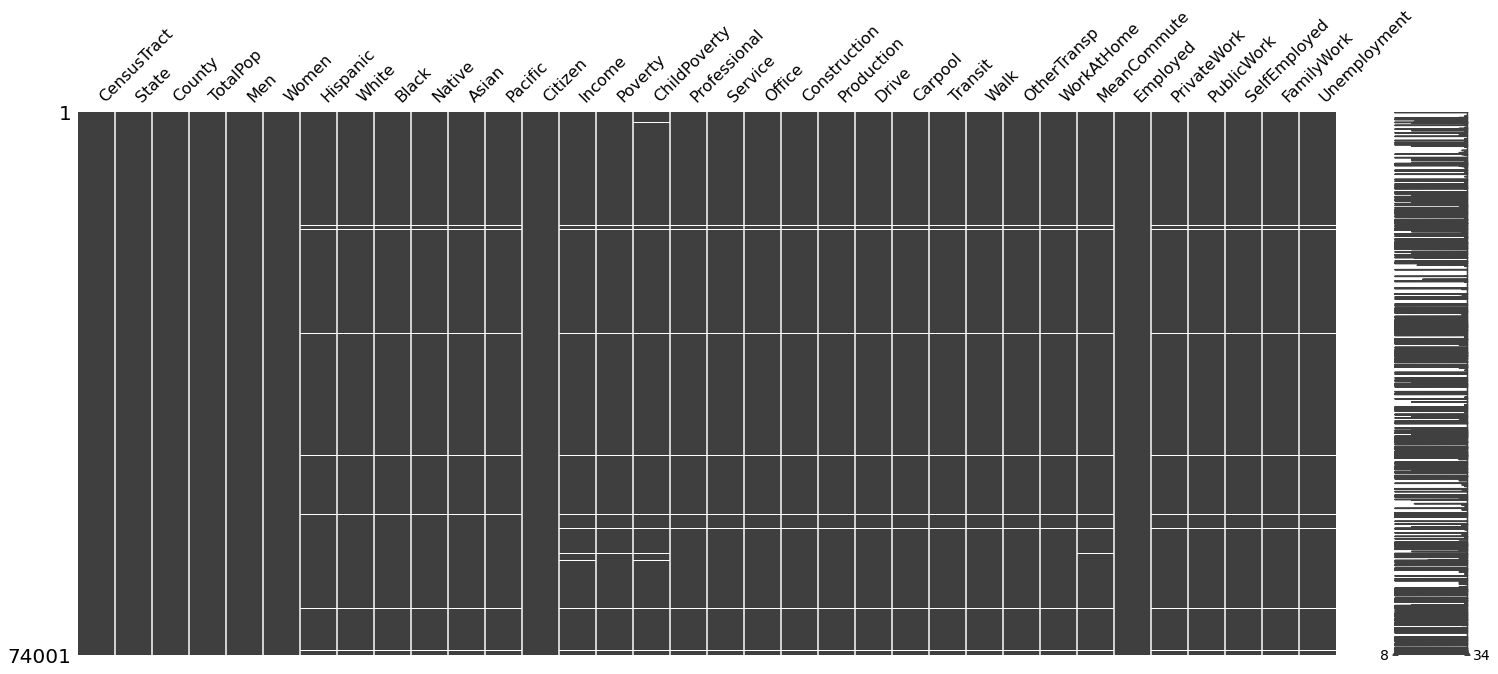

In [23]:
# Visualizing the  missing values as a matrix using missingno library
msno.matrix(df)

In [24]:
# Filter out data where total population > 0
df = df.loc[df['TotalPop'] > 0]
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True) # drop the rows  which have entire rows missing
df.head(5)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.90,87.40,7.70,0.30,0.60,0.00,1503,61838.00,8.10,8.40,34.70,17.00,21.30,11.90,15.20,90.20,4.80,0.00,0.50,2.30,2.10,25.00,943,77.10,18.30,4.60,0.00,5.40
1,1001020200,Alabama,Autauga,2156,1059,1097,0.80,40.40,53.30,0.00,2.30,0.00,1662,32303.00,25.50,40.30,22.30,24.70,21.50,9.40,22.00,86.30,13.10,0.00,0.00,0.70,0.00,23.40,753,77.00,16.90,6.10,0.00,13.30
2,1001020300,Alabama,Autauga,2968,1364,1604,0.00,74.50,18.60,0.50,1.40,0.30,2335,44922.00,12.70,19.70,31.40,24.90,22.10,9.20,12.40,94.80,2.80,0.00,0.00,0.00,2.50,19.60,1373,64.10,23.60,12.30,0.00,6.20
3,1001020400,Alabama,Autauga,4423,2172,2251,10.50,82.80,3.70,1.60,0.00,0.00,3306,54329.00,2.10,1.60,27.00,20.80,27.00,8.70,16.40,86.60,9.10,0.00,0.00,2.60,1.60,25.30,1782,75.70,21.20,3.10,0.00,10.80
4,1001020500,Alabama,Autauga,10763,4922,5841,0.70,68.50,24.80,0.00,3.80,0.00,7666,51965.00,11.40,17.50,49.60,14.20,18.20,2.10,15.80,88.00,10.50,0.00,0.00,0.60,0.90,24.80,5037,67.10,27.60,5.30,0.00,4.20


In [25]:
#confirm the number of missing values 
df.isnull().sum().sum()

0

<AxesSubplot:>

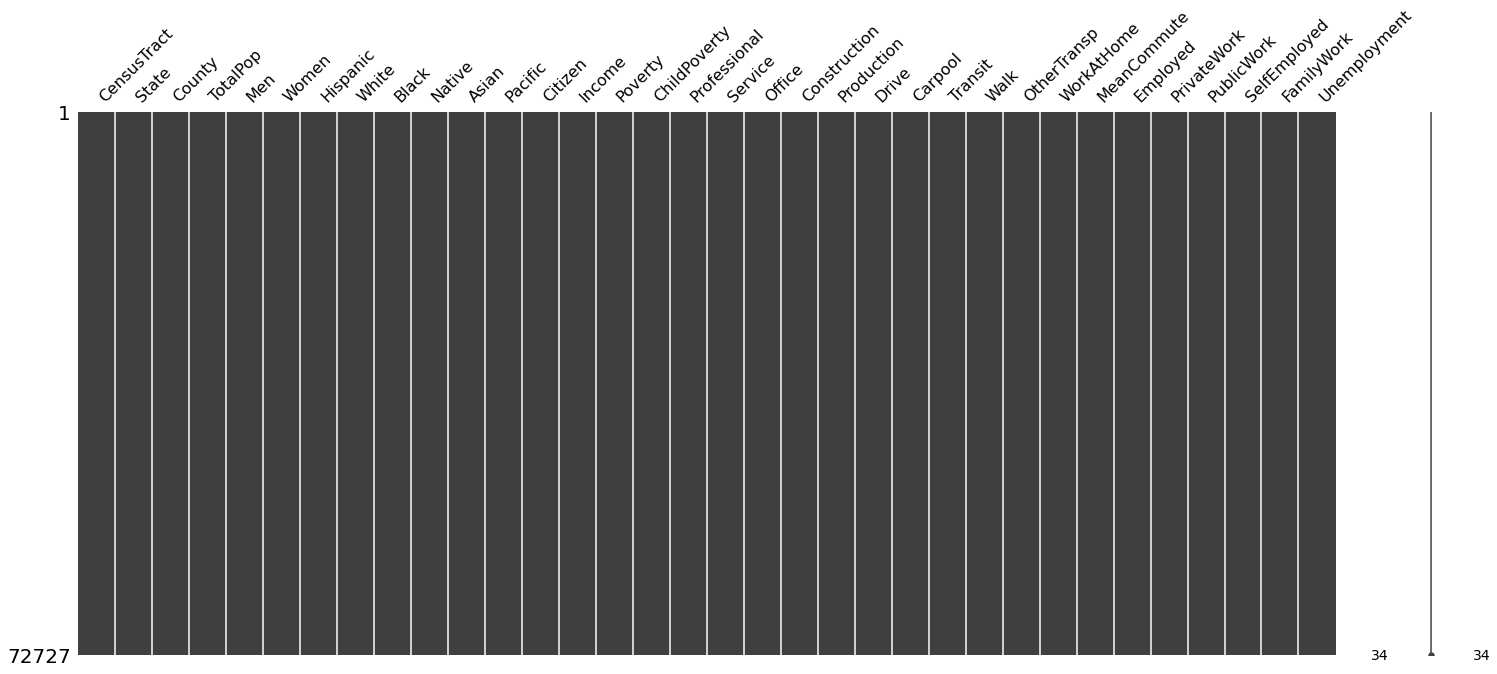

In [26]:
msno.matrix(df) # Again Check the missing values by matrix 

### Exploring the columns where the values are in totals.

In [28]:
df1=df[["TotalPop","Men","Women","Citizen","Employed"]].head()
df1.head()

,TotalPop,Men,Women,Citizen,Employed
0,1948,940,1008,1503,943
1,2156,1059,1097,1662,753
2,2968,1364,1604,2335,1373
3,4423,2172,2251,3306,1782
4,10763,4922,5841,7666,5037


## Convert the columns into percentage 

In [52]:
df['Men'] = (df['Men']/df['TotalPop'])*100
df['Women'] = (df['Women']/df['TotalPop'])*100
df['Citizen'] = (df['Citizen']/df['TotalPop'])*100
df['Employed'] = (df['Employed']/df['TotalPop'])*100
df.head(5)

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,48.25,51.75,0.90,87.40,7.70,0.30,0.60,0.00,77.16,61838.00,8.10,8.40,34.70,17.00,21.30,11.90,15.20,90.20,4.80,0.00,0.50,2.30,2.10,25.00,48.41,77.10,18.30,4.60,0.00,5.40
1,1001020200,Alabama,Autauga,2156,49.12,50.88,0.80,40.40,53.30,0.00,2.30,0.00,77.09,32303.00,25.50,40.30,22.30,24.70,21.50,9.40,22.00,86.30,13.10,0.00,0.00,0.70,0.00,23.40,34.93,77.00,16.90,6.10,0.00,13.30
2,1001020300,Alabama,Autauga,2968,45.96,54.04,0.00,74.50,18.60,0.50,1.40,0.30,78.67,44922.00,12.70,19.70,31.40,24.90,22.10,9.20,12.40,94.80,2.80,0.00,0.00,0.00,2.50,19.60,46.26,64.10,23.60,12.30,0.00,6.20
3,1001020400,Alabama,Autauga,4423,49.11,50.89,10.50,82.80,3.70,1.60,0.00,0.00,74.75,54329.00,2.10,1.60,27.00,20.80,27.00,8.70,16.40,86.60,9.10,0.00,0.00,2.60,1.60,25.30,40.29,75.70,21.20,3.10,0.00,10.80
4,1001020500,Alabama,Autauga,10763,45.73,54.27,0.70,68.50,24.80,0.00,3.80,0.00,71.23,51965.00,11.40,17.50,49.60,14.20,18.20,2.10,15.80,88.00,10.50,0.00,0.00,0.60,0.90,24.80,46.80,67.10,27.60,5.30,0.00,4.20


### Drop ‘Employed’ attribute because we have detail of different occupations in the different attributes such as 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'Other Transp', 'Work At Home', 'Mean Commute', 'PrivateWork','PublicWork', 'SelfEmployed', 'FamilyWork'. So we dropped the Employed attributes from our dataset.

In [53]:
df.drop(['Employed'], axis=1, inplace=True) 

In [54]:
df.columns  # Check the attributes list after dropping totalpop and Employed.

Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'PrivateWork',
       'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [55]:
cols = list(df.columns.values)
cols.pop(cols.index('Income')) 
df = df[cols+['Income']]                   #make the target variable at last
df.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Income
0,1001020100,Alabama,Autauga,1948,48.25,51.75,0.90,87.40,7.70,0.30,0.60,0.00,77.16,8.10,8.40,34.70,17.00,21.30,11.90,15.20,90.20,4.80,0.00,0.50,2.30,2.10,25.00,77.10,18.30,4.60,0.00,5.40,61838.00
1,1001020200,Alabama,Autauga,2156,49.12,50.88,0.80,40.40,53.30,0.00,2.30,0.00,77.09,25.50,40.30,22.30,24.70,21.50,9.40,22.00,86.30,13.10,0.00,0.00,0.70,0.00,23.40,77.00,16.90,6.10,0.00,13.30,32303.00
2,1001020300,Alabama,Autauga,2968,45.96,54.04,0.00,74.50,18.60,0.50,1.40,0.30,78.67,12.70,19.70,31.40,24.90,22.10,9.20,12.40,94.80,2.80,0.00,0.00,0.00,2.50,19.60,64.10,23.60,12.30,0.00,6.20,44922.00
3,1001020400,Alabama,Autauga,4423,49.11,50.89,10.50,82.80,3.70,1.60,0.00,0.00,74.75,2.10,1.60,27.00,20.80,27.00,8.70,16.40,86.60,9.10,0.00,0.00,2.60,1.60,25.30,75.70,21.20,3.10,0.00,10.80,54329.00
4,1001020500,Alabama,Autauga,10763,45.73,54.27,0.70,68.50,24.80,0.00,3.80,0.00,71.23,11.40,17.50,49.60,14.20,18.20,2.10,15.80,88.00,10.50,0.00,0.00,0.60,0.90,24.80,67.10,27.60,5.30,0.00,4.20,51965.00


In [56]:
df.to_csv('E:/st.clair college canada/semester 4th/DAB402_Capstone project/Cleaned_US_CENSUS_DATA_2015.csv')


## "NOW OUR DATASET CLEANED" Let's Move to Part 2